In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

In [4]:
train = datasets.MNIST("", train=True, download=True, 
                      transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True, 
                      transform = transforms.Compose([transforms.ToTensor()]))

  0%|          | 0/9912422 [00:00<?, ?it/s]

9920512it [00:00, 12483403.52it/s]                            


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


32768it [00:00, 238156.96it/s]           
0it [00:00, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw


1654784it [00:00, 4653106.79it/s]                             
0it [00:00, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw


8192it [00:00, 78931.65it/s]            


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


In [5]:
trainset = torch.utils.data.DataLoader(train,batch_size = 10, shuffle=True)
testset = torch.utils.data.DataLoader(test,batch_size = 10, shuffle=True)

In [25]:
import torch.nn as nn
import torch.nn.functional as F

In [31]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        
        x = self.fc4(x)
        
        
        return F.log_softmax(x, dim=1)
        
        
        
net = Net()
print(net)
        

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [44]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(),lr=0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        #data is a batch of featuresets and labels
        X, y = data
        net.zero_grad()
        output = net(X.view(-1,28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.1432, grad_fn=<NllLossBackward>)
tensor(0.1272, grad_fn=<NllLossBackward>)
tensor(0.0298, grad_fn=<NllLossBackward>)


In [47]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X,y = data
        output = net(X.view(-1,784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Accuracy: ",round(correct/total, 3))

Accuracy:  0.978


In [ ]:
print(torch.argmax(net(X[])))

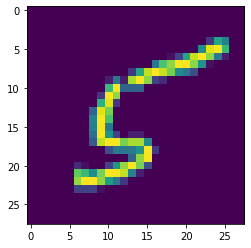

tensor(5)


In [55]:
import matplotlib.pyplot as plt
plt.imshow(X[8].view(28,28))
plt.show()
print(torch.argmax(net(X[8].view(-1,784))[0]))